입력 데이터 추가

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

첫 번째 합성곱 층

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding='same', input_shape = (28, 28,1 )))

model.add(keras.layers.MaxPooling2D(2))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


2번째 합성곱 층  + 완전 연결층

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

plot_model() 출력하기

In [6]:
keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 21s 13ms/step - loss: 0.5043 - accuracy: 0.8218 - val_loss: 0.3156 - val_accuracy: 0.8868
Epoch 2/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3330 - accuracy: 0.8807 - val_loss: 0.2726 - val_accuracy: 0.8998
Epoch 3/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2842 - accuracy: 0.8975 - val_loss: 0.2459 - val_accuracy: 0.9087
Epoch 4/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2521 - accuracy: 0.9077 - val_loss: 0.2320 - val_accuracy: 0.9137
Epoch 5/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2303 - accuracy: 0.9161 - val_loss: 0.2244 - val_accuracy: 0.9157
Epoch 6/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2115 - accuracy: 0.9208 - val_loss: 0.2285 - val_accuracy: 0.9144
Epoch 7/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1943 - accuracy: 0.9284 - val_loss: 0.2198 -

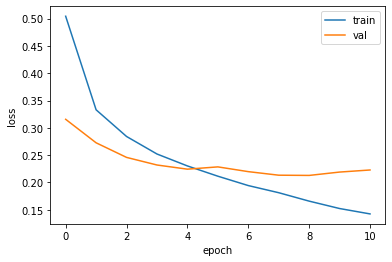

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train', 'val'])
plt.show()

In [26]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.2129 - accuracy: 0.9243


[0.21292103826999664, 0.9242500066757202]

AxesImage(54,36;334.8x217.44)


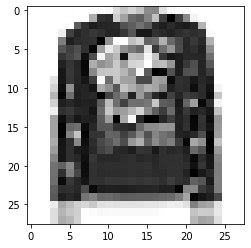

In [38]:
preds =plt.imshow(val_scaled[100].reshape(28, 28), cmap='gray_r')
print(preds)

In [35]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.6251945e-20 7.4464733e-29 6.4481920e-23 8.0109185e-25 9.0662788e-25
  7.0920017e-18 5.1267368e-20 3.9286368e-25 1.0000000e+00 2.0449294e-21]]


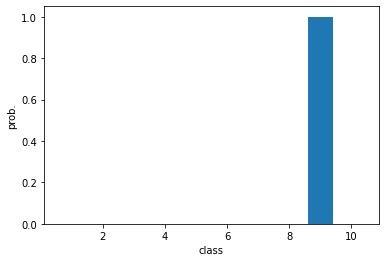

In [36]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [37]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [39]:
import numpy as np
print(classes[np.argmax(preds)])

티셔츠


In [32]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [33]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 7ms/step - loss: 0.2428 - accuracy: 0.9165


[0.24275685846805573, 0.9164999723434448]